# compile and run the Mie code in Colab

install gfortran compiler and netCDF library needed to compile the fortran code

In [ ]:
!apt-get install gfortran g++ gcc libnetcdf-dev libnetcdff-dev vim tmux &> /dev/null

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
from sympy import*

Mount Google Drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


## Compile and run the Mie code

Check the netCDF configurations
use the information with "--libs" in the Makefile of Mie code

In [ ]:
!nc-config --all


This netCDF 4.6.0 has been built with the following features: 

  --cc        -> /usr/bin/cc
  --cflags    -> -I/usr/include -I/usr/include/hdf5/serial
  --libs      -> -L/usr/lib/x86_64-linux-gnu -L/usr/lib/x86_64-linux-gnu/hdf5/serial -lnetcdf -lhdf5_hl -lhdf5 -lpthread -lsz -lz -ldl -lm -lcurl

  --has-c++   -> no
  --cxx       -> 

  --has-c++4  -> no
  --cxx4      -> 

  --has-fortran-> yes
  --fc        -> gfortran
  --fflags    -> -I/usr/include
  --flibs     -> -L/usr/lib -lnetcdff -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-z,now -lnetcdf -lnetcdf
  --has-f90   -> no
  --has-f03   -> yes

  --has-dap   -> yes
  --has-dap2  -> yes
  --has-dap4  -> yes
  --has-nc2   -> yes
  --has-nc4   -> yes
  --has-hdf5  -> yes
  --has-hdf4  -> no
  --has-logging-> no
  --has-pnetcdf-> no
  --has-szlib -> no
  --has-cdf5 -> no
  --has-parallel-> no

  --prefix    -> /usr
  --includedir-> /usr/include
  --libdir    -> /usr/lib/x86_64-linux-gnu
  --version   -> netCDF 4.6.0



In [ ]:
!ls /content/drive/Shareddrives/ZZhang_Teaching/Codes/Mie_code


 ang.dat		  Mie_Code_outputz.nc
'Copy of MIEV0.f'	  Mie_Code_water2.nc
 driver.f90		  mie_single_size_driver.exe
 driver_input.dat	  mie_single_size_driver.exe.dSYM
 ErrPack.f		  mie_single_size.exe
 ErrPack.o		  mie_single_size.exe.dSYM
 filename.dat		  mie_single_size.f90
 fndump.dat		  MIEV0.f
 gamma_size.f90		  MIEV0.o
 gamma_size.o		  POLDER_443p_Re1to50.nc
 Makefile		  python_mie
 Mie_Code_output2.nc	  rdi1mach_f90.mod
 Mie_Code_outputm.nc	  RDI1MACHmodule.F90
 Mie_Code_output.nc	  RDI1MACHmodule.o
 Mie_Code_output_q2b.nc   REFWAT.f
 Mie_Code_output_q2.nc	  REFWAT.o
 Mie_Code_outputq2.nc	  Single_Scattering_Mie_CloudSat.nc
 Mie_Code_output_q3b.nc   size.dat
 Mie_Code_output_q3.nc	  test.nc
 Mie_Code_output_q4.nc	  test_output.dat
 Mie_Code_outputq.nc	  wl_ref.dat
 Mie_Code_outputth1.nc	  write_data.f90
 Mie_Code_outputx.nc	  write_data.o
 Mie_Code_outputy.nc


 Go the folder of Mie Code and Compile it

In [ ]:
%cd /content/drive/Shareddrives/ZZhang_Teaching/Codes/Mie_code
!make

/content/drive/Shareddrives/ZZhang_Teaching/Codes/Mie_code
gfortran -O2 -g -o mie_single_size.exe mie_single_size.f90 MIEV0.o RDI1MACHmodule.o  ErrPack.o write_data.o -I/usr/include -L/usr/lib -lnetcdff -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-z,now -lnetcdf -lnetcdf
gfortran -O2 -g -o mie_single_size_driver.exe driver.f90 gamma_size.o REFWAT.o


## Mie code for single spherical particle
The Fortran core of Mie code "MIEV0.f" is developed by Wiscombe (1980). I added the fortran wrapper to the Mie code, which takes three files as input

1) filename.dat: specifies the name of output netCDF file <br>
2) size.dat: specifies the **diameter** of the sphere <br>
3) wl_ref.dat: specifies the wavelength and corresponding refractive index <br>



W. J. Wiscombe, "Improved Mie scattering algorithms," Appl. Opt. 19, 1505-1509 (1980)




In [ ]:
#Input for HW4 question 3
def write_mie_inputs():
  with open("filename.dat",'w') as f:
    f.write("Mie_Code_outputhw.nc")
  nwl = 1
  ##wl = [np.pi, np.pi]
  wl = [0.5]
  ##nr = [1.5, 1.3]
  nr = [1.33]
  ##ni = [0.01, 0.0001]
  ni = [0.001]
  with open("wl_ref.dat",'w') as f:
    f.write('{0:2d} \n'.format(nwl))
    for i in range(nwl):
      f.write('{0:10.7f} {1:5.3f} {2:7.3f} \n'.format(wl[i],nr[i],ni[i]))
  nD = 1000
  D=np.logspace(-1,1.4,1000)
  with open("size.dat",'w') as f:
    f.write('{:5d} \n'.format(nD))
    for i in range(nD):
      f.write('{0:7.3f} \n'.format(D[i]))

write_mie_inputs()

In [ ]:
!head filename.dat wl_ref.dat size.dat

==> filename.dat <==
Mie_Code_outputhw.nc
==> wl_ref.dat <==
 1 
 0.5000000 1.330   0.001 

==> size.dat <==
 1000 
  0.100 
  0.101 
  0.101 
  0.102 
  0.102 
  0.103 
  0.103 
  0.104 
  0.105 


After compiling, run a test case. This will generate a new netCDF file "Mie_Code_output.nc"

In [ ]:
import subprocess
import sys
result = subprocess.run( "./mie_single_size.exe",capture_output=True, text=True)

In [ ]:
%ls -lt *.nc

-rw------- 1 root root  28839940 Mar 28 02:31 Mie_Code_outputhw.nc
-rw------- 1 root root 115323976 Mar 28 01:31 Mie_Code_output.nc
-rw------- 1 root root  86495964 Mar 27 23:17 Mie_Code_water2.nc
-rw------- 1 root root  28839940 Mar 27 23:15 Mie_Code_outputm.nc
-rw------- 1 root root  28839940 Mar 27 23:05 Mie_Code_outputz.nc
-rw------- 1 root root  86495964 Mar 27 21:56 Mie_Code_outputx.nc
-rw------- 1 root root 345955976 Mar 27 17:17 Mie_Code_outputy.nc
-rw------- 1 root root 230639976 Mar 27 15:03 Mie_Code_outputth1.nc
-rw------- 1 root root     65612 Mar 21 14:48 Mie_Code_output_q2b.nc
-rw------- 1 root root 288327940 Mar 21 14:05 Mie_Code_output_q3b.nc
-rw------- 1 root root  28839940 Mar 21 03:38 Mie_Code_output_q3.nc
-rw------- 1 root root  28839940 Mar 19 21:06 Mie_Code_output_q4.nc
-rw------- 1 root root     36772 Mar 18 03:41 Mie_Code_output_q2.nc
-rw------- 1 root root     36772 Mar 17 05:26 Mie_Code_outputq2.nc
-rw------- 1 root root     36772 Mar 17 05:15 Mie_Code_outputq

# New Section

In [ ]:
## HW_Project1-Question 2
class Mie_Sca_Prop2():
  def __init__(self,fn):
    ncf = netCDF4.Dataset(fn,'r')
    self.D      =np.array(ncf.variables['Diameter']) #actually size parameter
    self.Nr     =np.array(ncf.variables['Refr_real']) #real refractive indexes
    self.Ni     =np.array(ncf.variables['Refr_img']) #imaginary refractive indexes
    self.Ang    =np.array(ncf.variables['PhaseFunctionAngle']) #Scattering angle
    self.SSA    =np.array(ncf.variables['SingleScatteringAlbedo']) #single scattering albedo
    self.Qe     =np.array(ncf.variables['ExtinctionEfficiency']) #Extinction effciency
    self.Asy    =np.array(ncf.variables['AsymmetryFactor']) #Asymmetry factor
    self.P11    =np.array(ncf.variables['P11']) #phase functions
    self.P12    =np.array(ncf.variables['P12'])*self.P11
    self.P33    =np.array(ncf.variables['P33'])*self.P11
    self.P34    =np.array(ncf.variables['P34'])*self.P11

    print('dimensions of variables')
    print('Diameter',self.D.shape)
    print('Refractive index',self.Nr.shape)
    print('Scattering Angle',self.Ang.shape)
    print('Qe, SSA, Asy shape',self.Qe.shape)
    print('P11 shape', self.P11.shape)

    print('*******************************************************')

    print('The Extinction efficiency (Qe) = ',self.Qe)
    print('The Single scattering albedo (W) = ',self.SSA)
    print(' P11(q) = ',self.P11)
    print(' P12(q)/P11(q) = ',-self.P12/self.P11)

  def plot(self):
    fig,ax=plt.subplots()
    ax.plot(self.Ang,self.P11[0,0,:], c= 'r',ls='solid')
    ax.plot(self.Ang,self.P11[-1,-1,:], c= 'r',ls='solid')
    #ax.set_yscale('log')
    ax.set_xlabel('Angle')
    ax.set_ylabel('P11')
    ax.grid(True)
    ax.set_title('Plot of P11 againt Scattering angle with perturbed ni',fontsize='large')



    fig,ax=plt.subplots()
    ax.plot(self.Ang,- self.P12[0,0,:]/self.P11[0,0,:], c= 'r',ls='solid')
    ax.set_xlabel('Angle')
    ax.set_ylabel('- P12/P11')
    ax.grid(True)
    ax.set_title('Plot of - P12/P11 againt Scattering angle with perturbed ni',fontsize='large')

In [ ]:
## HW_Project1-Question 3 - Eq. 4.129
a, n = symbols('a n')
Q = 8/3*(Abs((n**2-1)/(n**2+2))**2)
Q

2.66666666666667*Abs((n**2 - 1)/(n**2 + 2))**2

In [ ]:
Q.evalf(subs={n:0.001*I + 1.33})

0.110989860927576

In [ ]:
## HW_Project1-Question 3
class Mie_Sca_Prop2():
  def __init__(self,fn):
    ncf = netCDF4.Dataset(fn,'r')
    self.D      =np.array(ncf.variables['Diameter']) #actually size parameter
    self.Nr     =np.array(ncf.variables['Refr_real']) #real refractive indexes
    self.Ni     =np.array(ncf.variables['Refr_img']) #imaginary refractive indexes
    self.Ang    =np.array(ncf.variables['PhaseFunctionAngle']) #Scattering angle
    self.SSA    =np.array(ncf.variables['SingleScatteringAlbedo']) #single scattering albedo
    self.Qe     =np.array(ncf.variables['ExtinctionEfficiency']) #Extinction effciency
    self.Qs     =np.array(ncf.variables['ExtinctionEfficiency'])*self.SSA #Scattering effciency
    self.Asy    =np.array(ncf.variables['AsymmetryFactor']) #Asymmetry factor
    self.P11    =np.array(ncf.variables['P11']) #phase functions
    self.P12    =np.array(ncf.variables['P12'])*self.P11
    self.P33    =np.array(ncf.variables['P33'])*self.P11
    self.P34    =np.array(ncf.variables['P34'])*self.P11

    print('dimensions of variables')
    print('Diameter',self.D.shape)
    print('Refractive index',self.Nr.shape)
    print('Scattering Angle',self.Ang.shape)
    print('Extinction effciency shape',self.Qe.shape)
    print('Scattering effciency shape', self.Qs.shape)
    print('SSA shape', self.SSA.shape)

  def plot(self):
    fig,ax=plt.subplots()
    ax.plot(self.D,self.Qs, c= 'r',ls='solid')
    #ax.set_yscale('log')
    ax.set_xlabel('a')
    ax.set_ylabel('Qe')
    ax.grid(True)
    ax.set_title('Plot of Qe againt Size parameter',fontsize='large')

    Qer = np.power(self.D, 4)*0.110989860927576

    fig,ax=plt.subplots()
    ax.plot(self.D,self.Qs, c= 'g',ls='--',label='Mie Scatt')
    ax.plot(self.D,Qer, c= 'b',ls='solid',label='Rayleigh Scatt')
    #ax.set_yscale('log')
    ax.set_xlabel('a')
    ax.set_ylabel('Qs')
    ax.grid(True)
    ax.legend()
    ax.set_title('Plot of Qs againt Size parameter',fontsize='large')

In [ ]:
## HW_Project1-Question 3
class Mie_Sca_Prop2():
  def __init__(self,fn):
    ncf = netCDF4.Dataset(fn,'r')
    self.D      =np.array(ncf.variables['Diameter']) #actually size parameter
    self.Nr     =np.array(ncf.variables['Refr_real']) #real refractive indexes
    self.Ni     =np.array(ncf.variables['Refr_img']) #imaginary refractive indexes
    self.Ang    =np.array(ncf.variables['PhaseFunctionAngle']) #Scattering angle
    self.SSA    =np.array(ncf.variables['SingleScatteringAlbedo']) #single scattering albedo
    self.Qe     =np.array(ncf.variables['ExtinctionEfficiency']) #Extinction effciency
    self.Qs     =np.array(ncf.variables['ExtinctionEfficiency'])*self.SSA #Scattering effciency
    self.Asy    =np.array(ncf.variables['AsymmetryFactor']) #Asymmetry factor
    self.P11    =np.array(ncf.variables['P11']) #phase functions
    self.P12    =np.array(ncf.variables['P12'])*self.P11
    self.P33    =np.array(ncf.variables['P33'])*self.P11
    self.P34    =np.array(ncf.variables['P34'])*self.P11

    print('dimensions of variables')
    print('Diameter',self.D.shape)
    print('Refractive index',self.Nr.shape)
    print('Scattering Angle',self.Ang.shape)
    print('Extinction effciency shape',self.Qe.shape)
    print('Scattering effciency shape', self.Qs.shape)
    print('SSA shape', self.SSA.shape)

  def plot(self):
    fig,ax=plt.subplots()
    ax.plot(self.D,self.Qs, c= 'r',ls='solid')
    #ax.set_yscale('log')
    ax.set_xlabel('a')
    ax.set_ylabel('Qe')
    ax.grid(True)
    ax.set_title('Plot of Qe againt Size parameter',fontsize='large')

    Qer = np.power(self.D, 4)*0.230684320480019

    fig,ax=plt.subplots()
    ax.plot(self.D,self.Qs, c= 'r',ls='solid',label='Mie')
    ax.plot(self.D,Qer, c= 'b',ls='solid',label='Rayleigh')
    #ax.set_yscale('log')
    ax.set_xlabel('a')
    ax.set_ylabel('Qs')
    ax.grid(True)
    ax.legend()
    ax.set_title('Plot of Qs againt Size parameter',fontsize='large')

In [ ]:
25##Exam_ Question 3
class Mie_Sca_Prop():
  def __init__(self,fn):
    ncf = netCDF4.Dataset(fn,'r')
    self.D      =np.array(ncf.variables['Diameter']) #actually size parameter
    self.Nr     =np.array(ncf.variables['Refr_real']) #real refractive indexes
    self.Ni     =np.array(ncf.variables['Refr_img']) #imaginary refractive indexes
    self.Ang    =np.array(ncf.variables['PhaseFunctionAngle']) #Scattering angle
    self.SSA    =np.array(ncf.variables['SingleScatteringAlbedo']) #single scattering albedo
    self.Qe     =np.array(ncf.variables['ExtinctionEfficiency']) #Extinction effciency
    self.Asy    =np.array(ncf.variables['AsymmetryFactor']) #Asymmetry factor
    self.P11    =np.array(ncf.variables['P11']) #phase functions
    self.P12    =np.array(ncf.variables['P12'])*self.P11
    self.P33    =np.array(ncf.variables['P33'])*self.P11
    self.P34    =np.array(ncf.variables['P34'])*self.P11

    print('dimensions of variables')
    print('Diameter',self.D.shape)
    print('Refractive index',self.Nr.shape)
    print('Scattering Angle',self.Ang.shape)
    print('Qe, SSA, Asy shape',self.Qe.shape)
    print('P11 shape', self.P11.shape)
    print('SSA shape', self.SSA.shape)

    print(self.Ang)

  def bulk_average(self):
    ####
    D_Mies = self.D
    Qe_Mie = self.Qe
    ang_Mie = self.Ang
    alb_Mie = self.SSA
    p12_Mie = self.P12
    p11_Mie = self.P11
    asy_Mie = self.Asy
    ####pmom_Mie = dataset.variables['PMOM'][:]
    g_Mie  = self.Asy
    wl_Mie = [0.44, 0.67, 0.87, 1.02]
    D_Mie = self.D
    r_Mie = D_Mie/2
    ang_rad = ang_Mie*np.pi/180

    ####p11_lp_nor = np.full_like(p11_Mie,0)

    return ang_Mie,p11_Mie,p12_Mie,alb_Mie,wl_Mie, Qe_Mie, D_Mie, asy_Mie
    #return p12_wl_angles

In [ ]:
Mie_test = Mie_Sca_Prop('Mie_Code_outputhw.nc')

dimensions of variables
Diameter (1000,)
Refractive index (3,)
Scattering Angle (1801,)
Qe, SSA, Asy shape (1000, 3)
P11 shape (1000, 3, 1801)
SSA shape (1000, 3)
[0.000e+00 1.000e-01 2.000e-01 ... 1.798e+02 1.799e+02 1.800e+02]


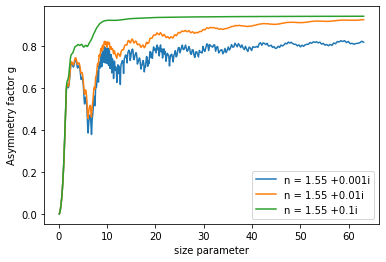

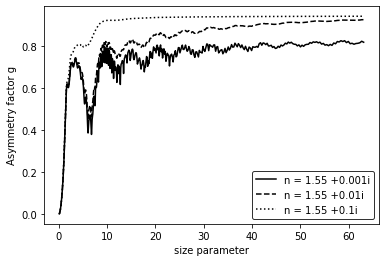

In [ ]:
ang_Mie,p11_Mie,p12_Mie,alb_Mie,wl_Mie, Qe_Mie, D_Mie, asy_Mie=Mie_test.bulk_average()

fig,ax=plt.subplots()
ax.plot(D_Mie,asy_Mie[:,0], label='n = 1.55 +0.001i')
ax.plot(D_Mie,asy_Mie[:,1], label='n = 1.55 +0.01i')
ax.plot(D_Mie,asy_Mie[:,2], label='n = 1.55 +0.1i')
#ax.set_xscale('log')
ax.set_xlabel('size parameter')
ax.set_ylabel('Asymmetry factor g')
plt.legend()

fig,ax=plt.subplots()
ax.plot(D_Mie,asy_Mie[:,0], color ='black', label='n = 1.55 +0.001i')
ax.plot(D_Mie,asy_Mie[:,1],'--', color = 'black', label='n = 1.55 +0.01i')
ax.plot(D_Mie,asy_Mie[:,2],':',color = 'black', label='n = 1.55 +0.1i')
#ax.set_xscale('log')
ax.set_xlabel('size parameter')
ax.set_ylabel('Asymmetry factor g')
plt.legend(edgecolor='black')


In [ ]:
Mie_test = Mie_Sca_Prop2('Mie_Code_outputhw.nc')

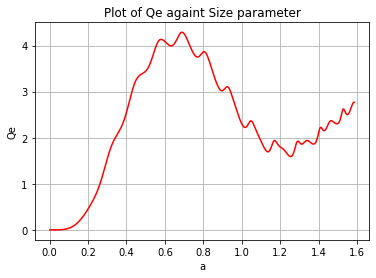

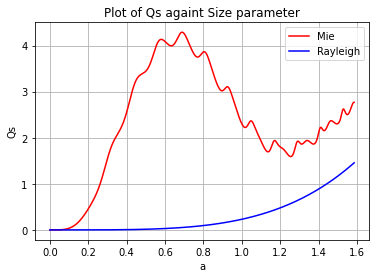

In [ ]:
Mie_test.plot()

In [ ]:
Mie_test = Mie_Sca_Prop2('Mie_Code_outputhw.nc')

dimensions of variables
Diameter (1000,)
Refractive index (1,)
Scattering Angle (1801,)
Extinction effciency shape (1000, 1)
Scattering effciency shape (1000, 1)
SSA shape (1000, 1)


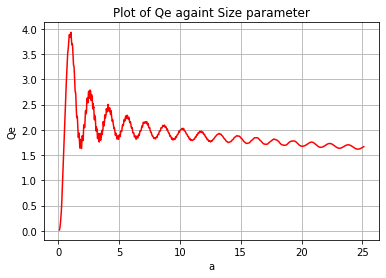

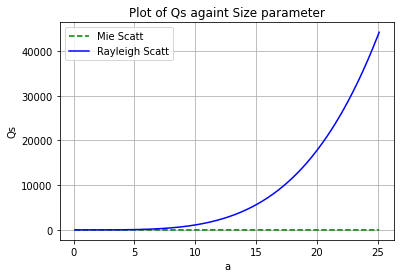

In [ ]:
Mie_test.plot()

In [ ]:
class Mie_Sca_Prop():
  def __init__(self,fn):
    ncf = netCDF4.Dataset(fn,'r')
    self.D      =np.array(ncf.variables['Diameter']) #actually size parameter
    self.Nr     =np.array(ncf.variables['Refr_real']) #real refractive indexes
    self.Ni     =np.array(ncf.variables['Refr_img']) #imaginary refractive indexes
    self.Ang    =np.array(ncf.variables['PhaseFunctionAngle']) #Scattering angle
    self.SSA    =np.array(ncf.variables['SingleScatteringAlbedo']) #single scattering albedo
    self.Qe     =np.array(ncf.variables['ExtinctionEfficiency']) #Extinction effciency
    self.Asy    =np.array(ncf.variables['AsymmetryFactor']) #Asymmetry factor
    self.P11    =np.array(ncf.variables['P11']) #phase functions
    self.P12    =np.array(ncf.variables['P12'])*self.P11
    self.P33    =np.array(ncf.variables['P33'])*self.P11
    self.P34    =np.array(ncf.variables['P34'])*self.P11

    print('dimensions of variables')
    print('Diameter',self.D.shape)
    print('Refractive index',self.Nr.shape)
    print('Scattering Angle',self.Ang.shape)
    print('Qe, SSA, Asy shape',self.Qe.shape)
    print('P11 shape', self.P11.shape)

    #print('*******************************************************')

   # print('The extinction efficiency is ',self.Qe)

  def plot(self):
    fig,ax=plt.subplots()
    ax.plot(self.D,self.Qe)
    ax.set_xscale('log')
    ax.set_xlabel('Diameter')
    ax.set_ylabel('Qe')

    fig,ax=plt.subplots()
    ax.plot(self.D,self.SSA)
    ax.set_xscale('log')
    ax.set_xlabel('Diameter')
    ax.set_ylabel('SSA')

    fig,ax=plt.subplots()
    ax.plot(self.Ang,self.P11[0,1,:])
    #ax.set_yscale('log')
    ax.set_xlabel('Angle')
    ax.set_ylabel('P11')

    fig,ax=plt.subplots()
    ax.plot(self.Ang,self.P12[0,1,:])
    ax.set_xlabel('Angle')
    ax.set_ylabel('P12')


In [ ]:
Mie_test = Mie_Sca_Prop('Mie_Code_output.nc')

dimensions of variables
Diameter (1000,)
Refractive index (1,)
Scattering Angle (1801,)
Qe, SSA, Asy shape (1000, 1)
P11 shape (1000, 1, 1801)


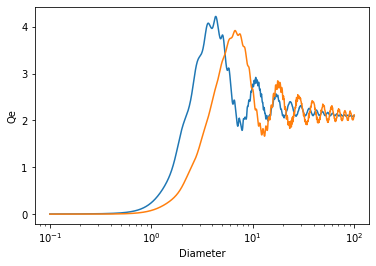

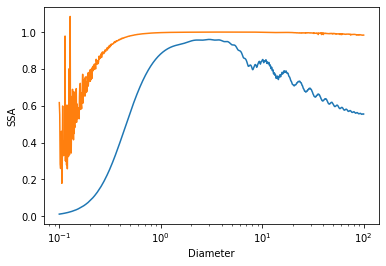

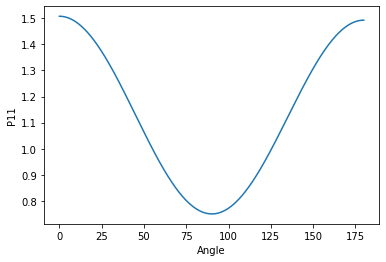

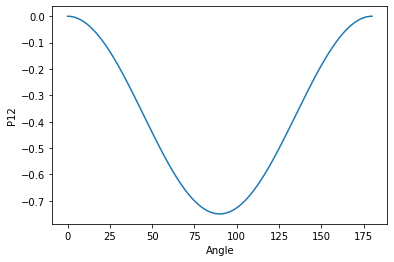

In [ ]:
Mie_test.plot()